# Upper Confidence Bound (UCB)

**1. Data Preprocessing**

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In this problem we start with **no** data,
and this dataset is just **simulation** of what is going to happen when we show ads to the users

In [21]:
dataframe = pd.read_csv('Ads_CTR_Optimisation.csv')
dataframe.head(5)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


**2. Implementation**

**2.1. Random Selection** (this algorithm is actually not very relevant)

In [22]:
import random

In [23]:
N = 10000
d = 10
ads_selection = []
total_reward = 0

In [24]:
for n in range(N):
    ad = random.randrange(d)
    ads_selection.append(ad)
    reward = dataframe.values[n, ad]
    total_reward += reward

In [25]:
total_reward

1246

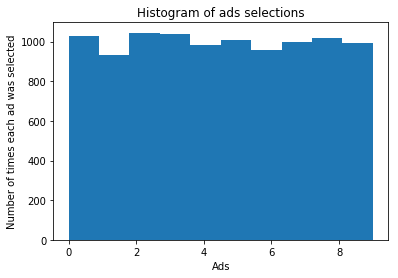

In [26]:
plt.hist(ads_selection)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

**2.2. Upper Confidence Bound Algorithm**

Step 1:

In [27]:
number_of_selections = [0] * d
sums_of_rewards = [0] * d
ads_selected = []
total_reward = 0

Step 2:

In [28]:
N = 10000
d = 10

In [29]:
for n in range(N):
    ad = 0
    max_upper_bound = 0
    for i in range(d):
        if number_of_selections[i] > 0:
            average_reward = sums_of_rewards[i] / number_of_selections[i]
            delta = math.sqrt((3/2) * math.log(n + 1) / number_of_selections[i])
            upper_bound = average_reward + delta
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    number_of_selections[ad] = number_of_selections[ad] + 1
    reward = dataframe.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

In [35]:
print('Total Reward: {}'.format(total_reward))

Total Reward: 2178


In [34]:
print('first 20: {}'.format(ads_selected[:20]))
# Converge to ad number 4
print('last 20: {}'.format(ads_selected[-20:]))

first 20: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
last 20: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


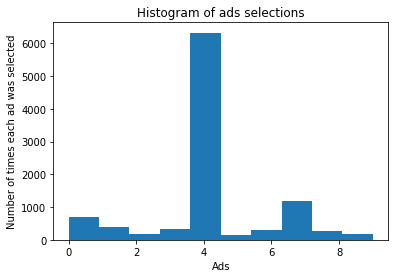

In [31]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()